### Data Visualisation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

data = pd.read_csv('data/london-borough-profiles-jan2018.csv', encoding='latin1')
data

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,8800.0,5326.0,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129.0,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228.0,Lab,0,100,0,36.5
3,E09000003,E09000003,Barnet,Outer London,389600.0,151423.0,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,.,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,244300.0,97736.0,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0,39.6
5,E09000005,E09000005,Brent,Outer London,332100.0,121048.0,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
6,E09000006,E09000006,Bromley,Outer London,327900.0,140602.0,"15,013",21.8,40.2,19.9,...,7.4,3.3,16,5.2,148.0,Cons,85,11.7,0,40.8
7,E09000007,E09000007,Camden,Inner London,242500.0,107654.0,"2,179",111.3,36.4,17.3,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
8,E09000008,E09000008,Croydon,Outer London,386500.0,159010.0,"8,650",44.7,37.0,22.0,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0,38.6
9,E09000009,E09000009,Ealing,Outer London,351600.0,132663.0,"5,554",63.3,36.2,21.4,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2


In [6]:
features = data.columns.tolist()
for feature in features:
    print(feature)

Code
New code
Area name
Inner/ Outer London
GLA Population Estimate 2017
GLA Household Estimate 2017
Inland Area (Hectares)
Population density (per hectare) 2017
Average Age, 2017
Proportion of population aged 0-15, 2015
Proportion of population of working-age, 2015
Proportion of population aged 65 and over, 2015
Net internal migration (2015)
Net international migration (2015)
Net natural change (2015)
% of resident population born abroad (2015)
Largest migrant population by country of birth (2011)
% of largest migrant population (2011)
Second largest migrant population by country of birth (2011)
% of second largest migrant population (2011)
Third largest migrant population by country of birth (2011)
% of third largest migrant population (2011)
% of population from BAME groups (2016)
% people aged 3+ whose main language is not English (2011 Census)
Overseas nationals entering the UK (NINo), (2015/16)
New migrant (NINo) rates, (2015/16)
Largest migrant population arrived during 2015/16


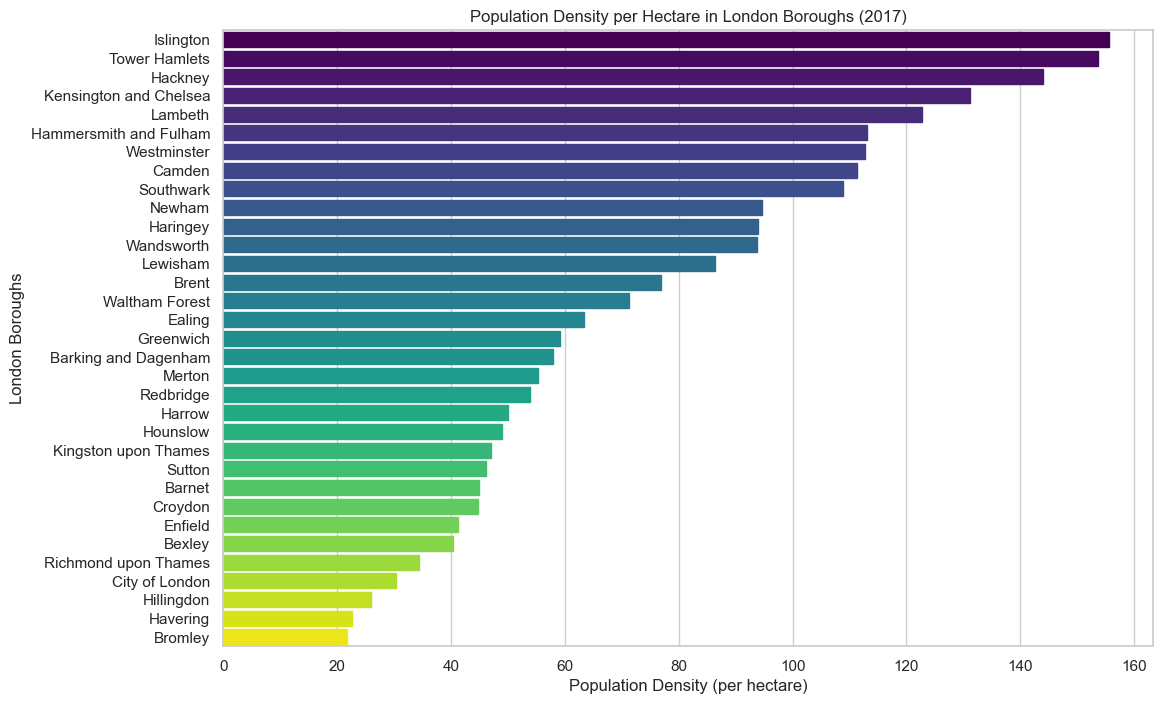

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pop_density_data is your pre-processed DataFrame
pop_density_data = data[['Area name', 'Population density (per hectare) 2017']].sort_values(by='Population density (per hectare) 2017', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Population density (per hectare) 2017', 
    y='Area name', 
    data=pop_density_data
)

# Get the number of bars in the barplot
num_bars = len(barplot.patches)

# Create a color map
cmap = plt.get_cmap('viridis')

# Assign a color from the color map to each bar
for i, bar in enumerate(barplot.patches):
    bar.set_color(cmap(i / num_bars))

plt.title('Population Density per Hectare in London Boroughs (2017)')
plt.xlabel('Population Density (per hectare)')
plt.ylabel('London Boroughs')

plt.savefig(f'visualisations/Population Density per Hectare in London Boroughs (2017).png', dpi=300)

plt.show()

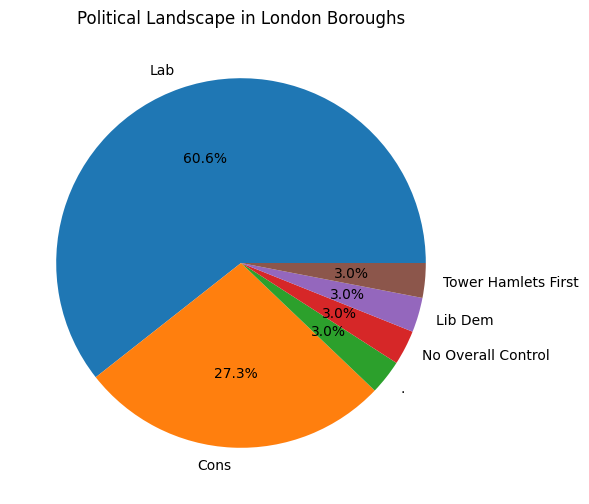

In [8]:
# Extracting the relevant data for the political landscape visualization
political_data = data['Political control in council'].value_counts().reset_index()
political_data.columns = ['Political Control', 'Count']

# Creating a pie chart for the political landscape analysis
plt.figure(figsize=(10, 6))
plt.pie(political_data['Count'], labels=political_data['Political Control'], autopct='%1.1f%%')
plt.title('Political Landscape in London Boroughs')

# Displaying the plot
plt.show()

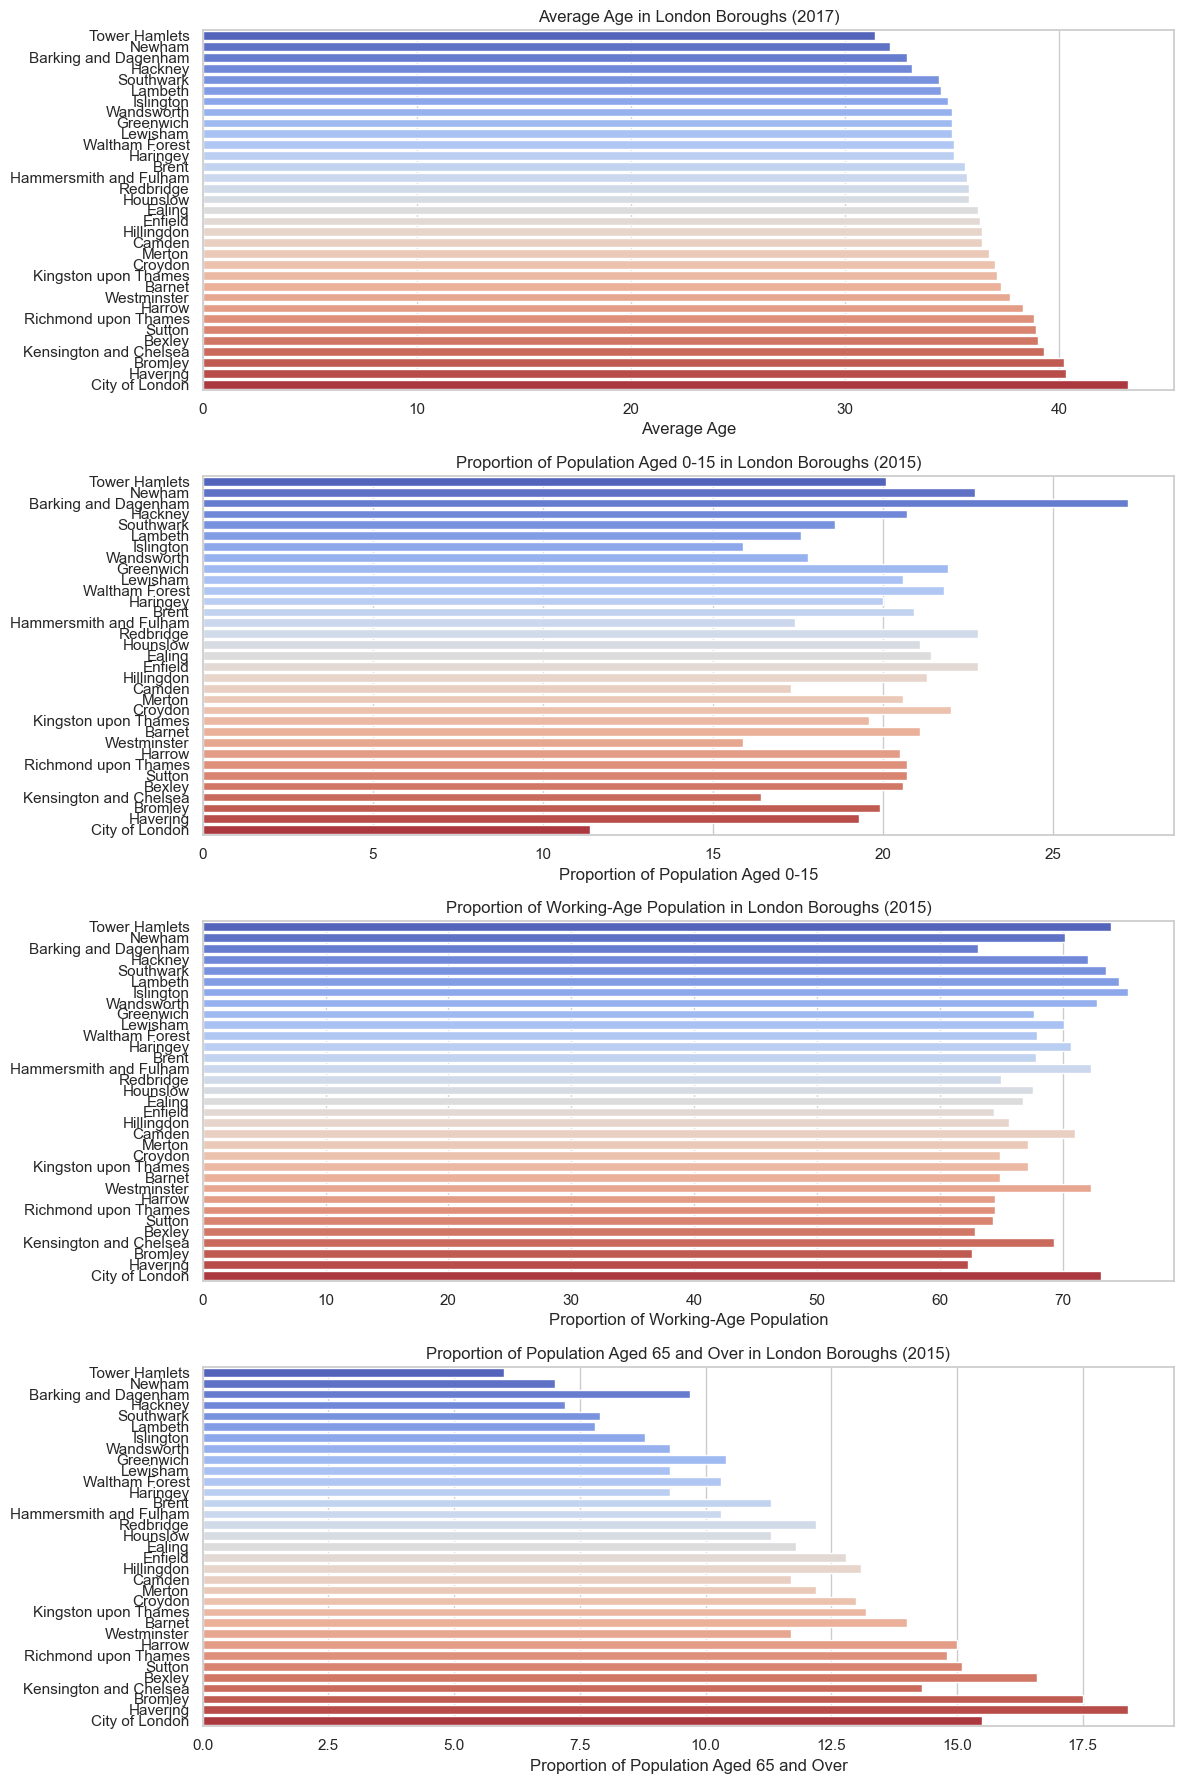

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for Age Distribution Visualization
age_data = data[['Area name', 'Average Age, 2017', 'Proportion of population aged 0-15, 2015',
                        'Proportion of population of working-age, 2015', 'Proportion of population aged 65 and over, 2015']]
age_data_sorted = age_data.sort_values(by='Average Age, 2017')

# Creating bar plots for Age Distribution
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Average Age
sns.barplot(ax=axes[0], x='Average Age, 2017', y='Area name', hue='Area name', data=age_data_sorted, palette='coolwarm', legend=False)
axes[0].set_title('Average Age in London Boroughs (2017)')
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('')

# Proportion of population aged 0-15
sns.barplot(ax=axes[1], x='Proportion of population aged 0-15, 2015', y='Area name', hue='Area name', data=age_data_sorted, palette='coolwarm', legend=False)
axes[1].set_title('Proportion of Population Aged 0-15 in London Boroughs (2015)')
axes[1].set_xlabel('Proportion of Population Aged 0-15')
axes[1].set_ylabel('')

# Proportion of population of working-age
sns.barplot(ax=axes[2], x='Proportion of population of working-age, 2015', y='Area name', hue='Area name', data=age_data_sorted, palette='coolwarm', legend=False)
axes[2].set_title('Proportion of Working-Age Population in London Boroughs (2015)')
axes[2].set_xlabel('Proportion of Working-Age Population')
axes[2].set_ylabel('')

# Proportion of population aged 65 and over
sns.barplot(ax=axes[3], x='Proportion of population aged 65 and over, 2015', y='Area name', hue='Area name', data=age_data_sorted, palette='coolwarm', legend=False)
axes[3].set_title('Proportion of Population Aged 65 and Over in London Boroughs (2015)')
axes[3].set_xlabel('Proportion of Population Aged 65 and Over')
axes[3].set_ylabel('')

plt.tight_layout()

plt.savefig(f'visualisations/Four Plot.png', dpi=300)

plt.show()

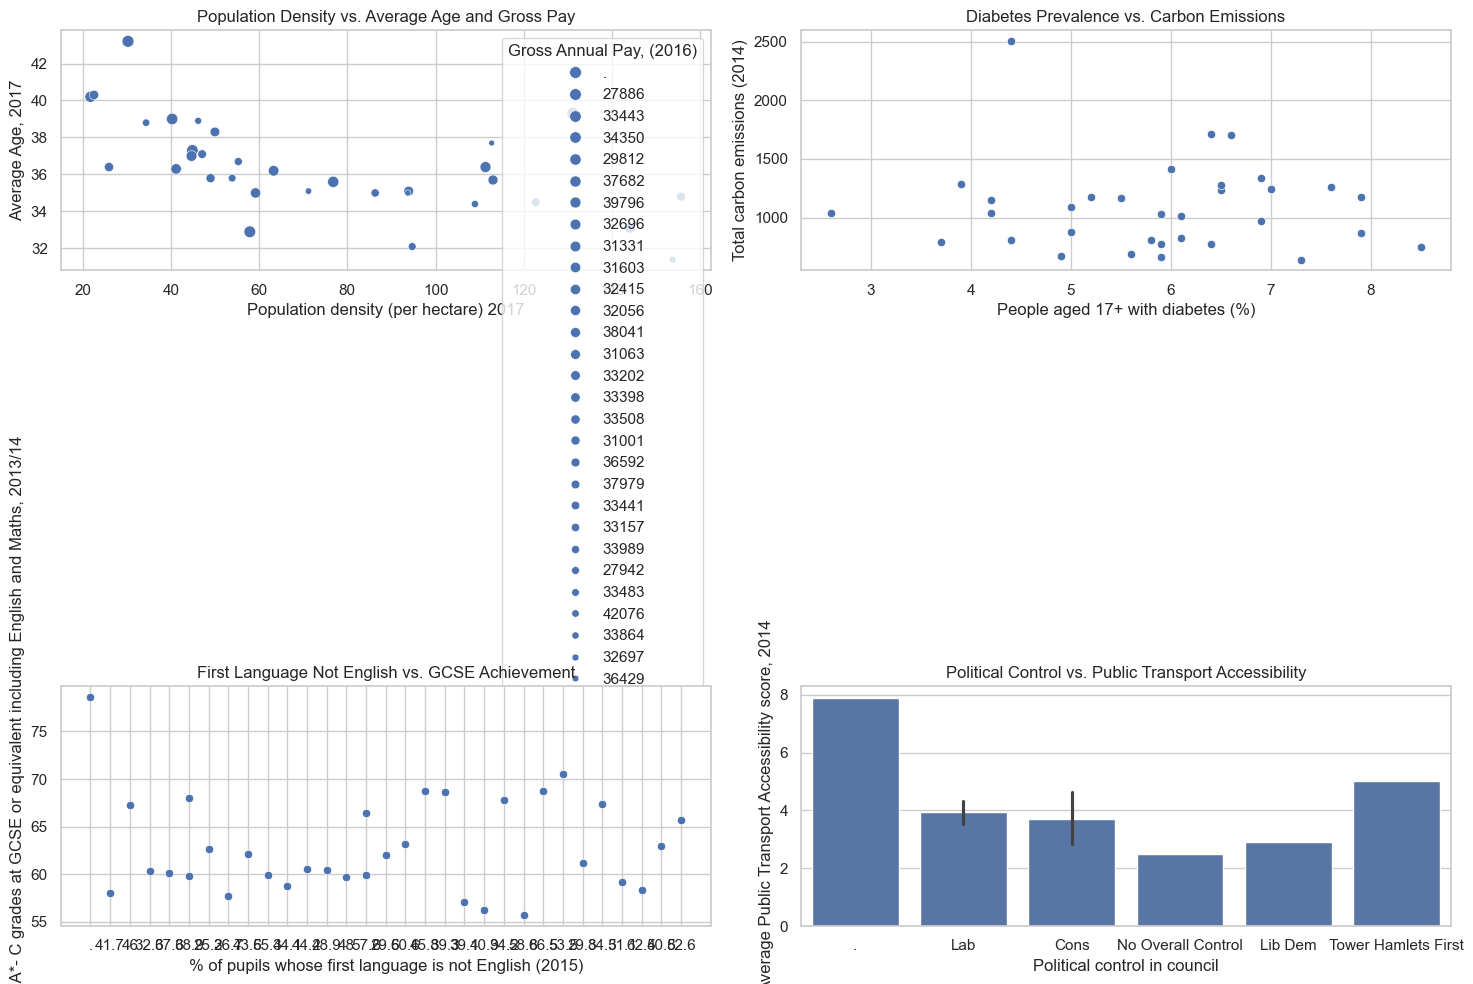

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of features for initial visualizations
# Demographics vs. Economic Indicators
feature_set_1 = ['Population density (per hectare) 2017', 'Average Age, 2017', 'Gross Annual Pay, (2016)']

# Health and Wellbeing vs. Environmental Factors
feature_set_2 = ['People aged 17+ with diabetes (%)', 'Total carbon emissions (2014)']

# Education vs. Demographic Information
feature_set_3 = ['% of pupils whose first language is not English (2015)', 'Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14']

# Political Landscape and Public Services
feature_set_4 = ['Political control in council', 'Average Public Transport Accessibility score, 2014']

# Preparing for visualization
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each feature set
sns.scatterplot(data=data, x=feature_set_1[0], y=feature_set_1[1], size=feature_set_1[2], ax=axs[0, 0], legend='full')
sns.scatterplot(data=data, x=feature_set_2[0], y=feature_set_2[1], ax=axs[0, 1])
sns.scatterplot(data=data, x=feature_set_3[0], y=feature_set_3[1], ax=axs[1, 0])
sns.barplot(data=data, x=feature_set_4[0], y=feature_set_4[1], ax=axs[1, 1])

# Setting titles for each subplot
axs[0, 0].set_title('Population Density vs. Average Age and Gross Pay')
axs[0, 1].set_title('Diabetes Prevalence vs. Carbon Emissions')
axs[1, 0].set_title('First Language Not English vs. GCSE Achievement')
axs[1, 1].set_title('Political Control vs. Public Transport Accessibility')

plt.tight_layout()
plt.show()


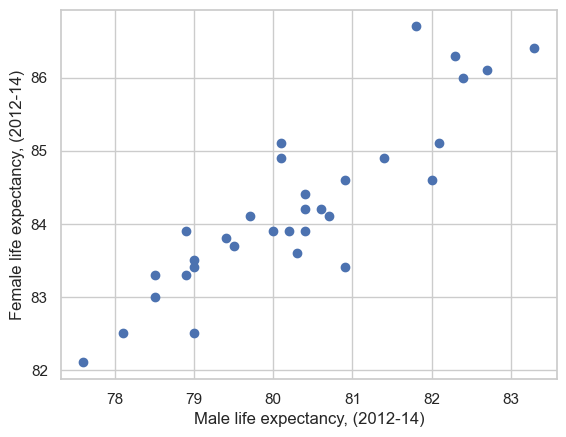

In [11]:
x = data['Male life expectancy, (2012-14)'] = pd.to_numeric(data['Male life expectancy, (2012-14)'], errors='coerce')
y = data['Female life expectancy, (2012-14)'] = pd.to_numeric(data['Female life expectancy, (2012-14)'], errors='coerce')

plt.scatter(x, y)
plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.show()

### Partitioning the Data

In [12]:
from sklearn import model_selection
from sklearn import datasets

In [13]:
print(x)

0      NaN
1      NaN
2     77.6
3     82.1
4     80.4
5     80.1
6     81.4
7     81.8
8     80.3
9     80.6
10    80.7
11    79.0
12    78.5
13    79.7
14    80.1
15    82.7
16    80.2
17    80.4
18    80.0
19    79.0
20    83.3
21    82.0
22    78.9
23    79.0
24    80.4
25    78.5
26    80.9
27    82.4
28    78.9
29    80.9
30    78.1
31    79.4
32    79.5
33    82.3
Name: Male life expectancy, (2012-14), dtype: float64


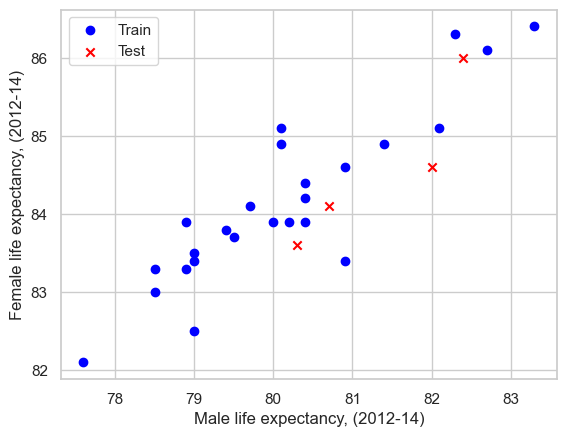

In [14]:
# For future purposes, we will reshape the data to be used in the regression model
x_reshaped = x.to_numpy().reshape(-1, 1)

# First splitting to create training and test sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_reshaped, y, test_size=0.1)
# Further split training set to create validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.1)

# Reset index after splitting to ensure proper indexing
# x_train = x_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

# Plot training data with blue color and circle marker
plt.scatter(x_train, y_train, color='blue', marker='o', label='Train')
# Plot test data with red color and x marker
plt.scatter(x_test, y_test, color='red', marker='x', label='Test')

plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.legend()
plt.show()

### Generate Synthetic Dataset

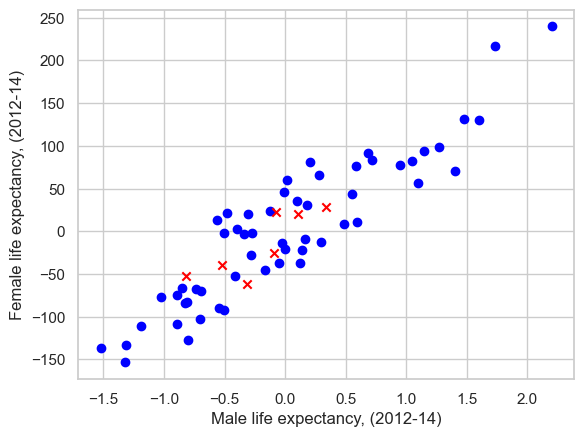

In [15]:
# 2x the size of the previous observation set
xs, ys, ps = datasets.make_regression(n_samples =70, n_features = 1, n_informative = 1, noise = 35, coef = True, random_state=112)
# First splitting to create training and test sets
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(xs, ys, test_size=0.1)
# Further split training set to create validation set
xs_train, xs_val, ys_train, ys_val = model_selection.train_test_split(xs_train, ys_train, test_size=0.1)

# Reset index after splitting to ensure proper indexing
# xs_train = x_train.reset_index(drop=True)
# ys_train = y_train.reset_index(drop=True)

plt.scatter(xs_train, ys_train, color='blue', marker='o', label='Train')
plt.scatter(xs_test, ys_test, color='red', marker='x', label='Test')
plt.xlabel('Male life expectancy, (2012-14)')
plt.ylabel('Female life expectancy, (2012-14)')
plt.show()

### Linear Regression on Data (I): Gradient Descent

In [16]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_val: ', x_val.shape)
print('y_val: ', y_val.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (27, 1)
y_train:  (27,)
x_val:  (3, 1)
y_val:  (3,)
x_test:  (4, 1)
y_test:  (4,)


In [17]:
import math

In [18]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing data in x_train, x_val, x_test
x_train = imputer.fit_transform(x_train)

x_val = imputer.transform(x_val)
x_test = imputer.transform(x_test)

# Impute missing data in y_train, y_val, y_test
# Note: Imputing target variable requires careful consideration and understanding of the data
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = imputer.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [19]:
print('x_train = \n', x_train)
print('y_train = \n', y_train)
print('x_val = \n', x_val)
print('y_val = \n', y_val)
print('x_test = \n', x_test)
print('y_test = \n', y_test)

x_train = 
 [[77.6  ]
 [80.4  ]
 [80.9  ]
 [80.9  ]
 [79.   ]
 [79.4  ]
 [79.7  ]
 [80.   ]
 [78.9  ]
 [80.4  ]
 [82.7  ]
 [83.3  ]
 [82.1  ]
 [80.2  ]
 [79.   ]
 [79.5  ]
 [80.1  ]
 [78.9  ]
 [80.1  ]
 [78.5  ]
 [79.   ]
 [80.128]
 [80.4  ]
 [81.4  ]
 [78.5  ]
 [80.128]
 [82.3  ]]
y_train = 
 [82.1   84.2   84.6   83.4   82.5   83.8   84.1   83.9   83.3   83.9
 86.1   86.4   85.1   83.9   83.4   83.7   85.1   83.9   84.9   83.
 83.5   84.148 84.4   84.9   83.3   84.148 86.3  ]
x_val = 
 [[81.8]
 [80.6]
 [78.1]]
y_val = 
 [86.7 84.2 82.5]
x_test = 
 [[82.4]
 [80.7]
 [82. ]
 [80.3]]
y_test = 
 [86.  84.1 84.6 83.6]


We will:

1. Initialise the weights randomly.

2. Compute the gradient with respect to each weight.

3. Update the weights by subtracting a fraction of the gradient from them.

In [20]:
def initialize_and_predict(X, initial_weights=None):
    """
    Initializes weights if not provided and calculates predictions.

    Args:
    X (np.array): Feature matrix.
    initial_weights (np.array): Initial weights for the model.

    Returns:
    np.array: Predicted values.
    """
    if initial_weights is None:
        # Initialize weights to zeros or small random values
        initial_weights = np.zeros(X.shape[1])

    predictions = X.dot(initial_weights)
    return predictions, initial_weights

initial_predictions, initial_weights = initialize_and_predict(x_train)

# Compute Errors

In [21]:
#--
# compute_error()
# This function computes the sum of squared errors for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  error (scalar)
#--
def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )


#--
# compute_r2()
# This function computes R^2 for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  r2 (scalar)
#--
def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )

# Run Gradient Descent and Build GIF

In [22]:
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import random

In [23]:
# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test).flatten()

# Initialize weight and bias (used) globally
w = random.random()
b = random.random()

# Generate a Standard Score

<ins> Mean Squared Error </ins>

(An ideal score would be 0)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the final error and R-squared on the test set
y_pred_test = w * x_test_scaled + b
test_error = compute_error(len(y_test), x_test_scaled, [b, w], y_test)

sklearn_mse_test = mean_squared_error(y_test, y_pred_test)

def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

manual_mse_test = manual_mse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

MSE (Test Set): 6878.34477799253


<ins> Sum of Squared Errors </ins>

(An ideal score would be 0)

(Same as MSE for one datapoint)

In [25]:
def manual_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

manual_sse_test = manual_sse(y_test, y_pred_test)
print(f'MSE (Test Set): {manual_mse_test}')

MSE (Test Set): 6878.34477799253


<ins> Root Mean Squared Error </ins>

(An ideal score would be 0)

In [26]:
sklearn_rmse_test = np.sqrt(sklearn_mse_test)

def manual_rmse(y_true, y_pred):
    return np.sqrt(manual_mse(y_true, y_pred))

manual_rmse_test = manual_rmse(y_test, y_pred_test)
print(f'RMSE (Test Set): {manual_rmse_test}')

RMSE (Test Set): 82.93578707646374


<ins> Mean of Absolute Differences </ins>

(An ideal score would be 0)

In [27]:
sklearn_mad_test = mean_absolute_error(y_test, y_pred_test)

def manual_mad(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

manual_mad_test = manual_mad(y_test, y_pred_test)
print(f'MAD (Test Set): {manual_mad_test}')

MAD (Test Set): 82.93432840881648


<ins> R-Squared </ins>

(An ideal model would be 1)

In [28]:
sklearn_r2_test = r2_score(y_test, y_pred_test)

def manual_r2(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    ssr = np.sum((y_true - y_pred) ** 2)
    return 1 - (ssr/sst)

manual_r2_test = manual_r2(y_test, y_pred_test)
print(f'R-squared (Test Set): {manual_r2_test}')

R-squared (Test Set): -8576.826691183158


<ins> Define Learning Rate and Epochs </ins>

(more sophisticated would use convergence criteria as epochs)

In [29]:
learning_rate = 0.001
epochs = 1000

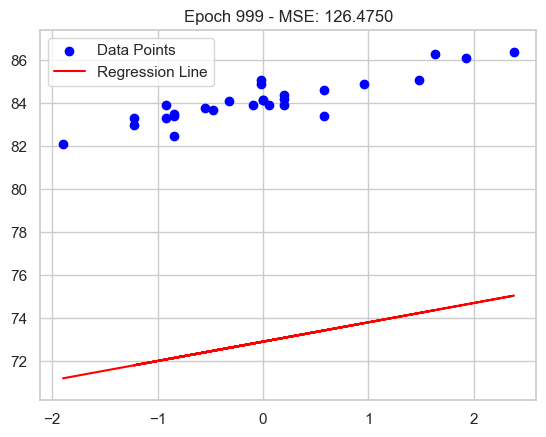

In [30]:
# Set up the figure
fig, ax = plt.subplots()
ax.scatter(x_train_scaled, y_train, color='blue', label='Data Points')
line, = ax.plot(x_train_scaled, x_train_scaled * w + b, color='red', label='Regression Line')
plt.legend()

# Set initial y-axis limits
ax.set_ylim(min(y_train) - 1, max(y_train) + 1)

# Initialize lists to store error metrics
mse_values = []
rmse_values = []
mad_values = []
r2_values = []

# Update function for animation
def update(epoch):
    global w, b # Need to modify global copy of w and b (weights and bias)

    # Predict the output using the current weights and bias and calculate the error
    y_pred = w * x_train_scaled + b
    error = y_train - y_pred
    mse = np.mean(error**2)

    # Calculate the gradients for weights and bias
    dw = -2 * np.dot(x_train_scaled.T, error) / len(x_train_scaled)
    db = -2 * np.sum(error) / len(x_train_scaled)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    # Update the regression line
    line.set_ydata(y_pred)

    # Calculate and append the error metrics
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    mad = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    mse_values.append(mse)
    rmse_values.append(rmse)
    mad_values.append(mad)
    r2_values.append(r2)

    
    # Dynamically adjust the minimum y-value of the plot
    current_min_y = min(y_train.min(), y_pred.min()) - 1
    ax.set_ylim(current_min_y, ax.get_ylim()[1])

    # Update the plot
    # line.set_ydata(x_train_scaled * w + b)
    ax.set_title(f'Epoch {epoch} - MSE: {mse:.4f}')
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, epochs), interval=50)

# Save to GIF (this requires ffmpeg or pillow to be installed)
ani.save(f'linear_regression_L{learning_rate}_E{epochs}.gif', writer='pillow')

plt.show()

<ins> Plotting the Respective Errors </ins>

We are looking for convergence on zero from positive values for all but R^2.

The scientific notation equates to scale factor of graph. 

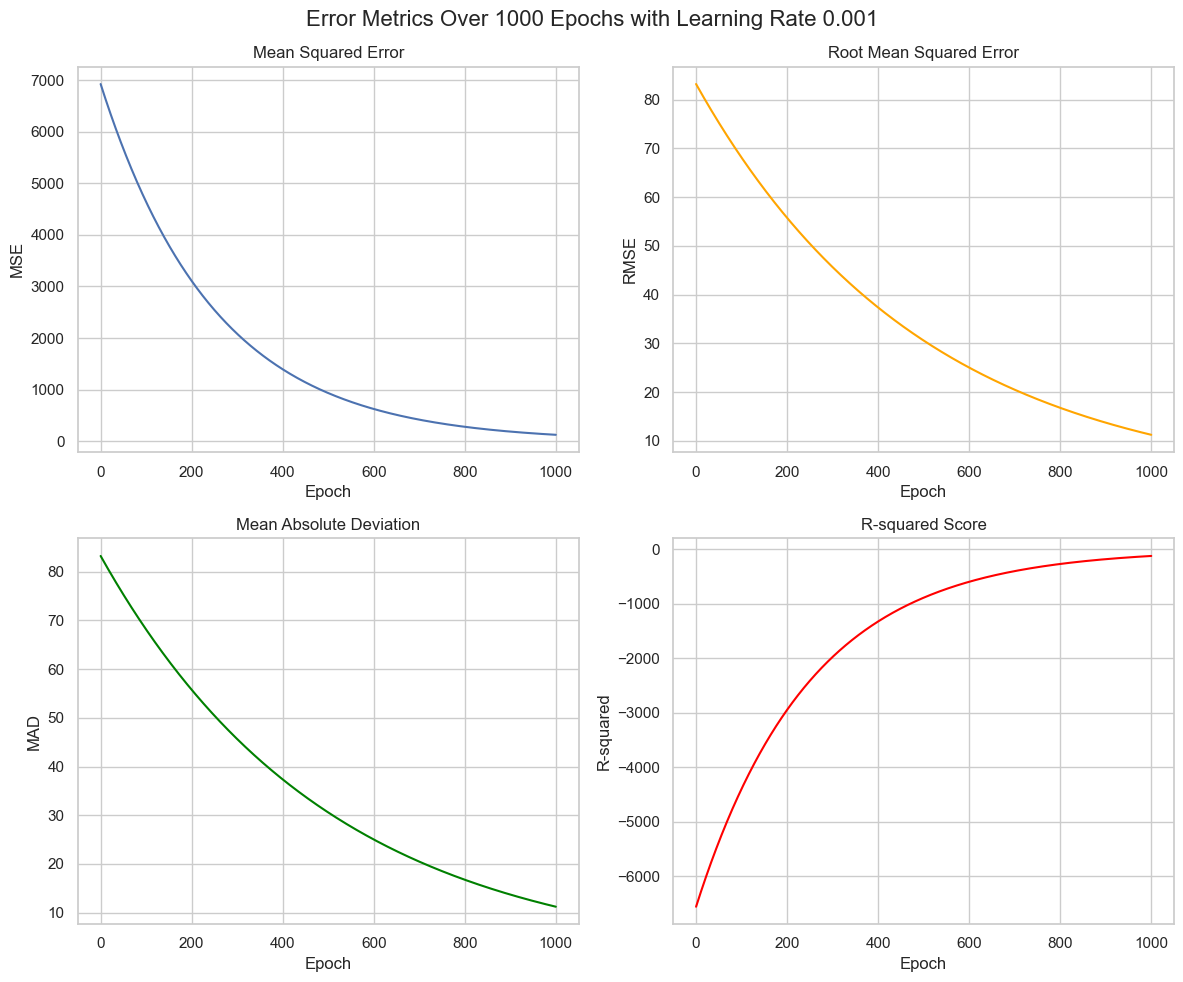

In [31]:
# Plot the error metrics with adjusted axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(f'Error Metrics Over {epochs} Epochs with Learning Rate {learning_rate}', fontsize=16)

# For MSE
axes[0, 0].plot(mse_values, label='MSE')
axes[0, 0].set_title('Mean Squared Error')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('MSE')
# axes[0, 0].ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# For RMSE
axes[0, 1].plot(rmse_values, label='RMSE', color='orange')
axes[0, 1].set_title('Root Mean Squared Error')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('RMSE')
# axes[0, 1].set_ylim([min(rmse_values), max(rmse_values)])  # Adjust y-axis range

# For MAD
axes[1, 0].plot(mad_values, label='MAD', color='green')
axes[1, 0].set_title('Mean Absolute Deviation')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAD')
# axes[1, 0].set_ylim([min(mad_values), max(mad_values)])  # Adjust y-axis range

# For R-squared
axes[1, 1].plot(r2_values, label='R-squared', color='red')
axes[1, 1].set_title('R-squared Score')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('R-squared')
# axes[1, 1].set_ylim([min(r2_values), max(r2_values)])  # Adjust y-axis range

plt.tight_layout()

# Create and save the animation
plt.savefig(f'error_graphs_L{learning_rate}_E{epochs}.png', dpi=300)

plt.show()

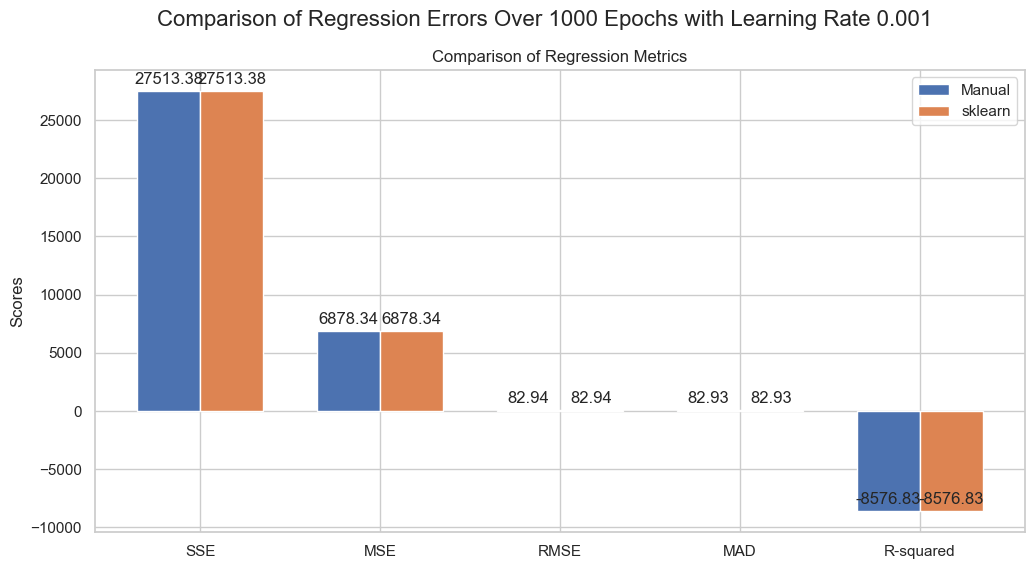

In [32]:
# Make predictions with the trained model
y_pred_train = w * x_train_scaled + b
y_pred_test = w * x_test_scaled + b

# Visualization
metrics = ['SSE', 'MSE', 'RMSE', 'MAD', 'R-squared']
manual_scores = [manual_sse_test, manual_mse_test, manual_rmse_test, manual_mad_test, manual_r2_test]
sklearn_scores = [manual_sse_test, sklearn_mse_test, sklearn_rmse_test, sklearn_mad_test, sklearn_r2_test]  # SSE is the same

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Comparison of Regression Errors Over {epochs} Epochs with Learning Rate {learning_rate}', fontsize=16)

rects1 = ax.bar(x - width/2, manual_scores, width, label='Manual')
rects2 = ax.bar(x + width/2, sklearn_scores, width, label='sklearn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig(f'compare_errors_L{learning_rate}_E{epochs}.png', dpi=300)

plt.show()

# 2. Run for synthetic data: it should take 10k iterations apparently?
# 3. Show the convergence gif for a higher learning rate. Should converge within a few iterations.